<a href="https://colab.research.google.com/github/porkens/myTestRepo/blob/main/FrozenLake_UM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import gym

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=True)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
#Funkcja env.P odpowiada za podgląd stanów i nagród w poszczególnych etapach akcji podjętych w określonych stanach.
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [ ]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

In [ ]:
def generate_session(env, policy, t_max = 5000):
  
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  
  for t in range(t_max):
    
    action = np.random.choice(n_actions, p = policy[observation])

    new_observation, reward, done, info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward
    observation = new_observation
    
    if done:
      break

  return observations, actions, total_reward

In [ ]:
def select_elites(observation_batch, actions_batch, total_reward_batch, percentile):

  reward_treshold = np.percentile(total_reward_batch, percentile)

  elite_observations = []
  elite_actions = []

  for i in range(len(total_reward_batch)):
    if total_reward_batch[i] > reward_treshold:
      elite_observations += (observations_batch[i])
      elite_actions += (actions_batch[i])

  return elite_observations, elite_actions

In [ ]:
sessions = [generate_session(env, policy) for i in range(3)]
observations_batch, actions_batch, total_reward_batch = zip(*sessions)

In [ ]:
percentile = 80
elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

In [ ]:
def update_policy(elite_observations, elite_actions):

  policy_updated = policy
  elite_observations_unique = set(elite_observations)
  actions_count = {observation:[0]*n_actions for observation in elite_observations_unique}
  
  for observation, action in zip(elite_observations, elite_actions):
    actions_count[observation][action]+=1

  for observation in elite_observations_unique:
    policy_updated[observation] = np.array(actions_count[observation] / np.sum(actions_count[observation]))

  return policy_updated

In [ ]:
policy_updated = update_policy(elite_observations,elite_actions)
print(policy_updated)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [ ]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, precentile):

  reward = np.mean(rewards_batch)
  treshold = np.percentile(rewards_batch, percentile)
  log.append([reward, treshold])

  plt.figure(figsize=[8, 4])
  plt.plot(list(zip(*log))[0], label = "reward")
  plt.plot(list(zip(*log))[1], label = "Reward treshold")
  plt.grid()

  clear_output(True)
  print("reward:",reward)
  print("treshold:", treshold)
  plt.show()

In [ ]:
env.reset()
policy = initialize_policy(n_states, n_actions)

reward: 0.16
treshold: 0.0


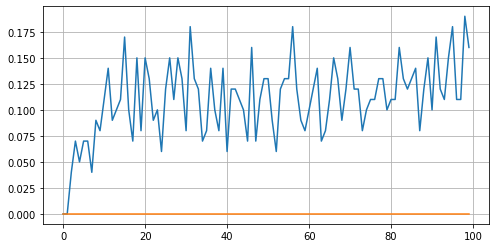

In [ ]:
n_sessions = 100 #Tu trzeba dostrajać parametry żeby uzuskać reward > 0.5
percentile = 0.5
learning_rate = 0.3

log = []

for i in range(100):

  sessions = [generate_session(env, policy, t_max=5000) for j in range(n_sessions)]

  observations_batch, actions_batch, total_reward_batch = zip(*sessions)

  elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

  policy_updated = update_policy(elite_observations, elite_actions)

  policy = learning_rate * policy_updated + (1 - learning_rate)* policy

  show_progress(total_reward_batch, log, percentile)


In [ ]:
policy

array([[0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
observation = env.reset()

for t in range(100):

  action = np.random.choice(n_actions, p = policy[observation])
  
  new_observation, reward, done, info = env.step(action)

  observation = new_observation  


  print(t, done)
  env.render()

  if done:
      break

0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
1 False
  (Left)
SFFF
FHFH
FFFH
HFFG
2 False
  (Left)
SFFF
FHFH
FFFH
HFFG
3 False
  (Up)
SFFF
FHFH
FFFH
HFFG
4 False
  (Left)
SFFF
FHFH
FFFH
HFFG
5 False
  (Left)
SFFF
FHFH
FFFH
HFFG
6 False
  (Down)
SFFF
FHFH
FFFH
HFFG
7 False
  (Down)
SFFF
FHFH
FFFH
HFFG
8 False
  (Down)
SFFF
FHFH
FFFH
HFFG
9 False
  (Down)
SFFF
FHFH
FFFH
HFFG
10 False
  (Left)
SFFF
FHFH
FFFH
HFFG
11 False
  (Left)
SFFF
FHFH
FFFH
HFFG
12 False
  (Left)
SFFF
FHFH
FFFH
HFFG
13 False
  (Up)
SFFF
FHFH
FFFH
HFFG
14 False
  (Down)
SFFF
FHFH
FFFH
HFFG
15 False
  (Up)
SFFF
FHFH
FFFH
HFFG
16 False
  (Left)
SFFF
FHFH
FFFH
HFFG
17 False
  (Up)
SFFF
FHFH
FFFH
HFFG
18 False
  (Down)
SFFF
FHFH
FFFH
HFFG
19 False
  (Up)
SFFF
FHFH
FFFH
HFFG
20 False
  (Down)
SFFF
FHFH
FFFH
HFFG
21 False
  (Up)
SFFF
FHFH
FFFH
HFFG
22 False
  (Down)
SFFF
FHFH
FFFH
HFFG
23 False
  (Up)
SFFF
FHFH
FFFH
HFFG
24 False
  (Left)
SFFF
FHFH
FFFH
HFFG
25 False
  (Down)
SFFF
FHFH
FFFH
HFFG
26 False
  (Down)
SFFF
FHFH
FFFH
HFF